# **Exploratory Data Analysis (EDA)**

**What is EDA?** Exploratory Data Analysis: this is unavoidable and one of the major step to fine-tune the given data set(s) in a different form of analysis to understand the insights of the key characteristics of various entities of the data set like column(s), row(s) by applying Pandas, NumPy, Statistical Methods, and Data visualization packages. 

I belive that **70 percent** of machine learning enginner time consuming is *EDA and Data Cleaning*, Thererore, in this Notebook, I will go through many steps that will reveal hidden secrets in this competation.

So, Why are we waiting?? Let's started

# **Table of Contents**

* [1. IMPORTING PACKAGES & LOADING DATASETS](#section1)

* [2. TRAIN DATASET ANALYSIS](#section2)
    * [2.1 Dataset Preview](#section2.1)
    * [2.2 Memory Usage Reduce](#section2.2)
    * [2.3 Avg Sales By Day, Week, Month and Day Of Week](#section2.3)
    * [2.4 Total Sales vs. On Promotion](#section2.4)
    * [2.5 Avg Sales by Family Products](#section2.5)
    * [2.6 Avg Sales by Store No.](#section2.6)
    * [2.7 Determine Trend](#section2.7)
    * [2.8 Determine Seasonality](#section2.8)
    * [2.9 Lagged Series and Lag Plots](#section2.9)
    
    
* [3. HOLIDAYS & EVENTS](#section3)

    * [3.1 Holidays & Events Dataset Analysis](#section3.1)
    * [3.2 Avg Sales on Holidays vs. Workdays](#section3.2)
    
    
* [4. OIL PRICES](#section4)

    * [4.1 Oil Dataset Preview ](#section4.1)
    * [4.2 Avg Sales vs Oil Prices](#section4.2)
    
    
* [5. STORES ANALYSIS ](#section5) 

* [6. TRANSACTIONS ](#section6) 

    * [6.1 Transactions Dataset Preview](#section6.1)
    * [6.2 Total Sales vs Transactions](#section6.2)



 # 1. IMPORTING PACKAGES & LOADING DATASETS <a class="anchor"  id="section1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import simplefilter
simplefilter('ignore')

## Set Plot Parameters
sns.set(color_codes=True)        
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)
plot_params = dict(color="0.75", style=".-", markeredgecolor="0.25", markerfacecolor="0.25", legend=False)

In [12]:
path='D:/Kiran/Pytho/store-sales-time-series/store-sales-time-series-forecasting/'

## Train & Test Datasets
train=pd.read_csv(path+'train.csv',parse_dates=['date'])
test=pd.read_csv(path+'test.csv',parse_dates=['date'])

## Supplementary Datasets
oil=pd.read_csv(path+'oil.csv',parse_dates=['date'])
holidays_events=pd.read_csv(path+'holidays_events.csv',parse_dates=['date'])
stores=pd.read_csv(path+'stores.csv')
transactions=pd.read_csv(path+'transactions.csv',parse_dates=['date'])

# 2. TRAIN DATASET ANALYSIS <a class="anchor"  id="section2"></a>

## 2.1 Dataset Preview <a class="anchor"  id="section2.1"></a>

First of all, we need to interview with train dataset and get some knowledge from its structure, missing values, value counts...etc.

Then I will meet with our target variable "sales" and get some statistics like (min,max,mean,median and skewness).

In [13]:
display(train.head())
display(train.info())

def info(dataset):
    
    """ This defination is to print most valuable information
        about dataset columns.
        Input: dataset
        Output: dataset columns information
    """
    for column in dataset.columns:
        print('==========%s =========='%column)
        print('Type is: ',dataset[column].dtype)
        print(dataset[column].value_counts())
        print('Number of unique values: ',dataset[column].nunique())
        print('Number of null values: ',dataset[column].isna().sum())

info(train)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


None

==========id ==========
Type is:  int64
0          1
2000584    1
2000586    1
2000587    1
2000588    1
          ..
1000298    1
1000299    1
1000300    1
1000301    1
3000887    1
Name: id, Length: 3000888, dtype: int64
Number of unique values:  3000888
Number of null values:  0
==========date ==========
Type is:  datetime64[ns]
2013-01-01    1782
2016-01-15    1782
2016-02-08    1782
2016-02-07    1782
2016-02-06    1782
              ... 
2014-07-13    1782
2014-07-12    1782
2014-07-11    1782
2014-07-10    1782
2017-08-15    1782
Name: date, Length: 1684, dtype: int64
Number of unique values:  1684
Number of null values:  0
==========store_nbr ==========
Type is:  int64
1     55572
46    55572
36    55572
37    55572
38    55572
39    55572
4     55572
40    55572
41    55572
42    55572
43    55572
44    55572
45    55572
47    55572
10    55572
48    55572
49    55572
5     55572
50    55572
51    55572
52    55572
53    55572
54    55572
6     55572
7     55572
8     55572
35

Skewness of sales:  7.358757818882655


count    3.000888e+06
mean     3.577757e+02
std      1.101998e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.100000e+01
75%      1.958473e+02
max      1.247170e+05
Name: sales, dtype: float64

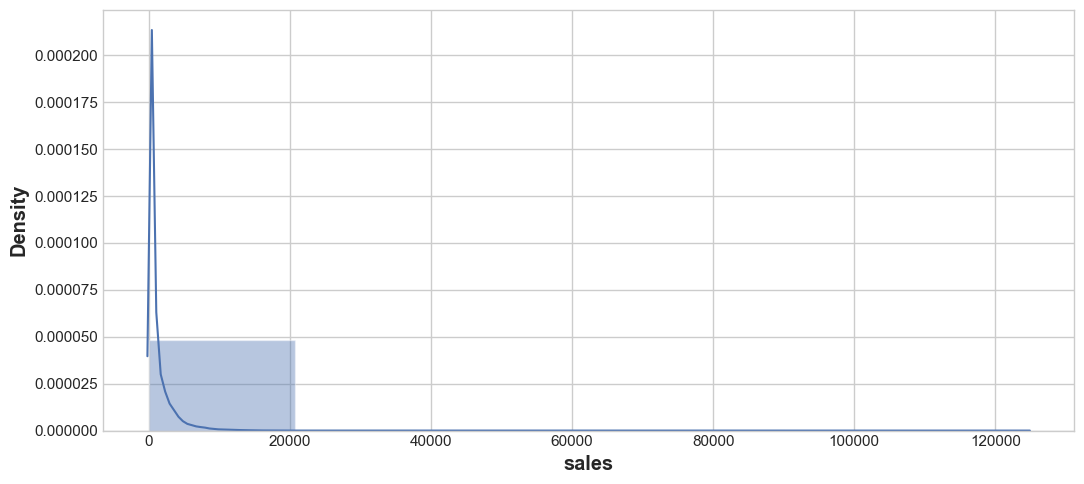

In [14]:
print('Skewness of sales: ',train['sales'].skew())
display(train['sales'].describe()) ## get statistics from target variable

sns.distplot(train['sales'],bins=6)
plt.show()

The sales variable is highly positive skewness, the given distribution is shifted to the left and with its tail on the right side.

## 2.2 Memory Usage Reduce <a class="anchor"  id="section2.2"></a>

The memory usage of the train dataset is pretty large, we can reduce it by some data type conversions like:

* Convert dtype for [id] from "int64" to "int32"
* Convert dtype for [store_nbr] from "int64" to "int8"
* Convert dtype for [family] from "object" to "category"
* Convert dtype for [sales] from "float64" to "float32"
* Convert dtype for [onpromotion] from "int64" to "int16"

In [15]:
train['id']=train.id.astype('int32')
train['store_nbr']=train.store_nbr.astype('int8')
train['family']=train.family.astype('category')
train['sales']=train.sales.astype('float32')
train['onpromotion']=train.onpromotion.astype('int16')
display(train.info(verbose=False,memory_usage=True))
print('\nIndeed, we succeed to reduce the memory usage from 137M to 57M (more than half) this will be reflected in speed processing especially for EDA tasks.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Columns: 6 entries, id to onpromotion
dtypes: category(1), datetime64[ns](1), float32(1), int16(1), int32(1), int8(1)
memory usage: 57.2 MB


None


Indeed, we succeed to reduce the memory usage from 137M to 57M (more than half) this will be reflected in speed processing especially for EDA tasks.


## 2.3 Avg Sales By Day, Week, Month and Day Of Week <a class="anchor"  id="section2.3"></a>

First, I just want to look at sales distribution at many time frames, without taking into considration any feature correlation.

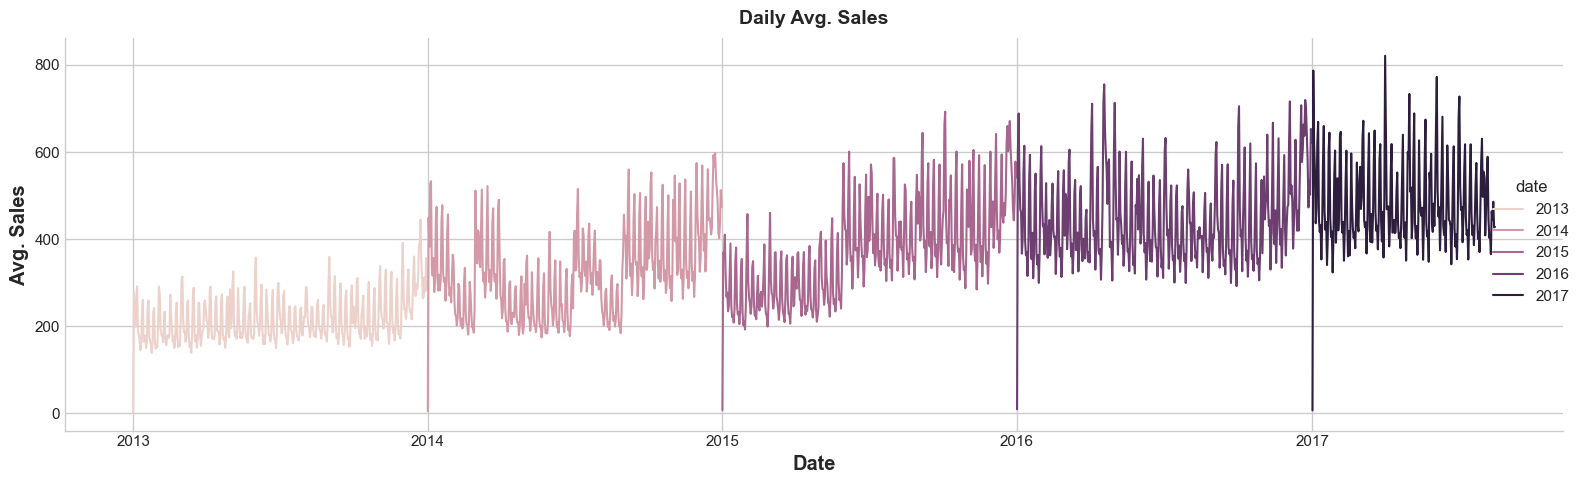

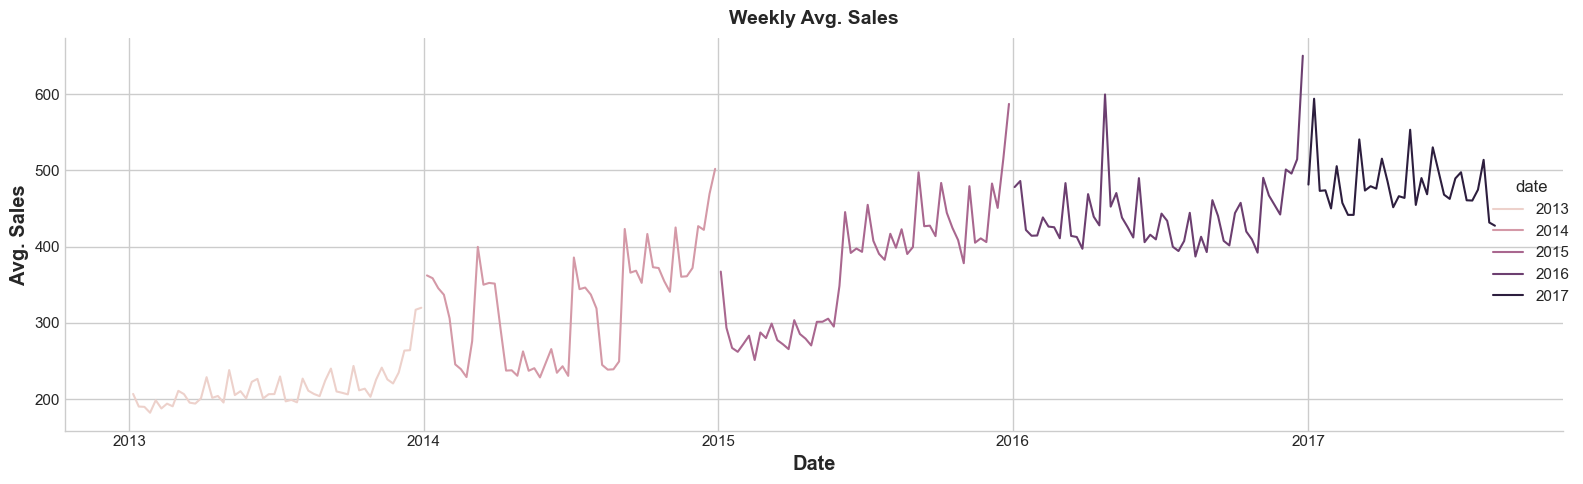

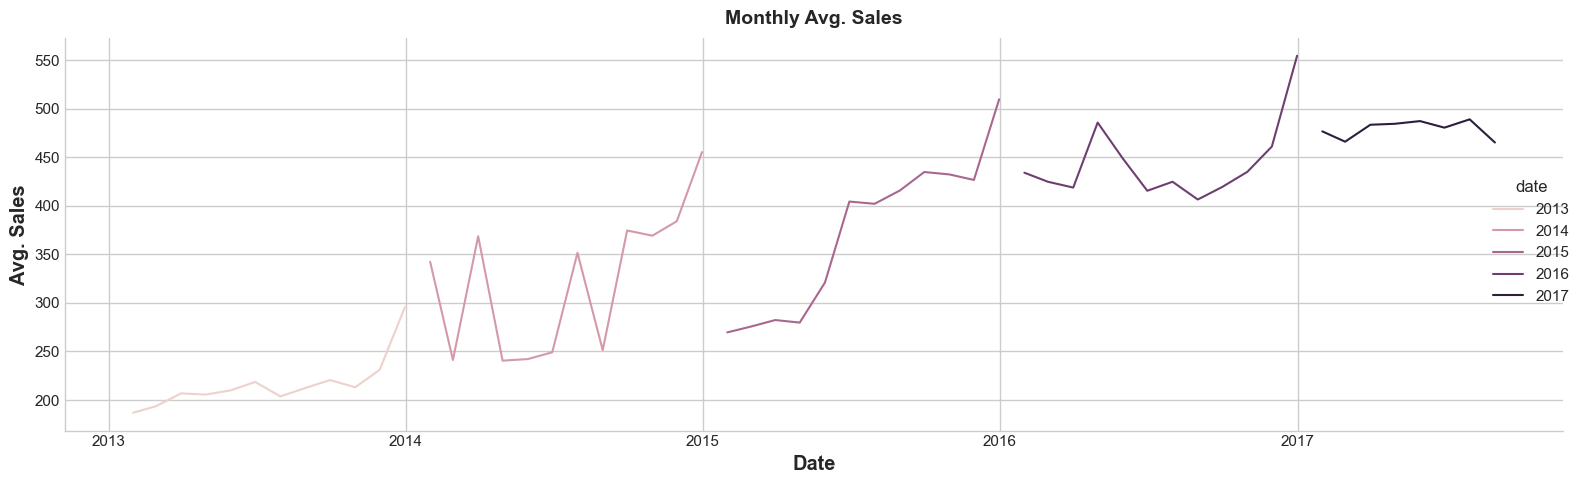

In [16]:
train_eda = train.copy() ## Initializing a copy of train dataset for EDA purpose,
##                          and to preserve the original train dataset

train_eda=train_eda.set_index('date') ## Setting date to index for simple handling

daily_sales=train_eda.resample('D').sales.mean().to_frame()  ## Resample sales by day
weekly_sales=train_eda.resample('W').sales.mean().to_frame()  ## Resample sales by week
monthly_sales=train_eda.resample('M').sales.mean().to_frame()  ## Resample sales by month

df=[daily_sales,weekly_sales,monthly_sales]
titles=['Daily Avg. Sales','Weekly Avg. Sales','Monthly Avg. Sales']

for i,j in zip(df,titles):
    
    sns.relplot(x=i.index,y=i.sales,kind='line',aspect=3,hue=i.index.year)
    plt.xlabel('Date')
    plt.ylabel('Avg. Sales')
    plt.title(j)

plt.show()

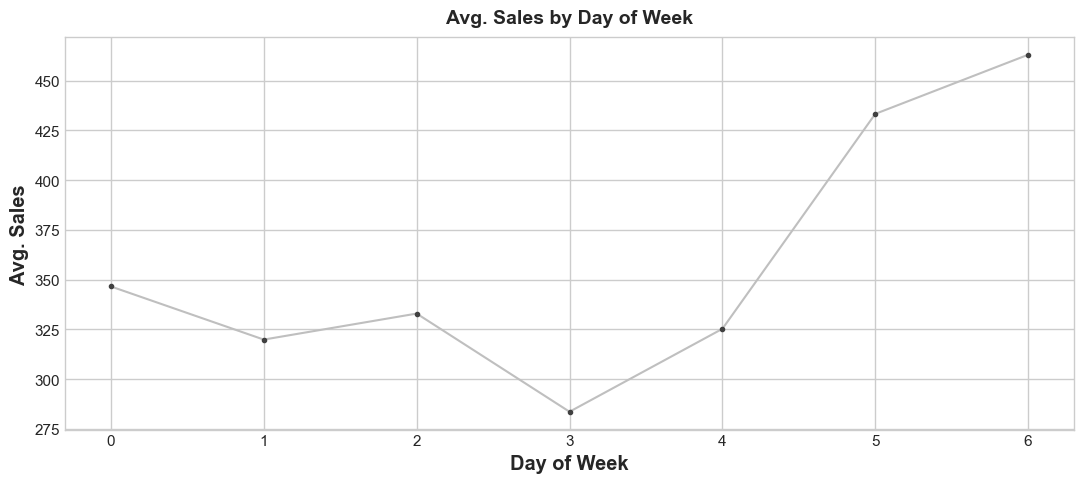

In [17]:
## Group by day of week

temp=train_eda.groupby(train_eda.index.day_of_week)['sales'].mean().to_frame()

temp.plot(**plot_params)
plt.xlabel('Day of Week')
plt.ylabel('Avg. Sales')
plt.title('Avg. Sales by Day of Week')
plt.show()

**Conclusions:**

1. Sales are increased at annual basis, that indicates a trend variable (will be investigated soon)

2. There are peaks at daily / weekly basis at weekends, that indicates a seasonality variable (will be investigated soon)

3. A zero sales at each start of a year can be shown from "Daily Avg. Sales", due to Favorita Supermarkets chain were closed at that days.

4. Generally, sales on Thursdays are smaller than rest of days.

## 2.4 Total Sales vs. On Promotion <a class="anchor"  id="section2.4"></a>



**onpromotion**: gives the total number of items in a product family that were being promoted at a store at a given date.

I belive there is a correlation between the sales and onpromotion variables that deserve to investigate.

The correlation between sales & onpromotion is:  0.5749 



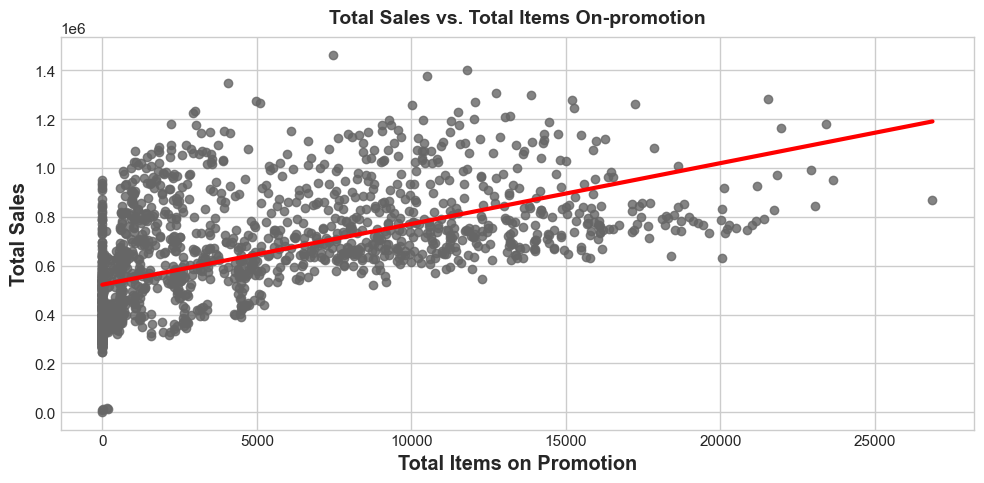

In [18]:
avg_sales=train_eda.groupby(['date'])['sales','onpromotion'].sum().reset_index() 

print('The correlation between sales & onpromotion is: ',
      np.round(avg_sales[['sales','onpromotion']].corr().iloc[0,1],4),'\n')

plt.figure(figsize=(10,5))
sns.regplot(data=avg_sales,x='onpromotion',y='sales',ci=None,
            scatter_kws={'color':'0.4'},line_kws={'color':'red','linewidth':3})
plt.xlabel('Total Items on Promotion')
plt.ylabel('Total Sales')
plt.title('Total Sales vs. Total Items On-promotion')
plt.show()

- There is a positive correlation between onpromotion and sales units sold. Thus, when more items are on promotion, it's more likely to sell them.

## 2.5 Avg Sales by Family Products <a class="anchor"  id="section2.5"></a>



**family** identifies the type of product sold.

What are the best selling family products?? I guess that data scientists at Favorita supermarkets have done that analysis. Also me do like to perform this task :)

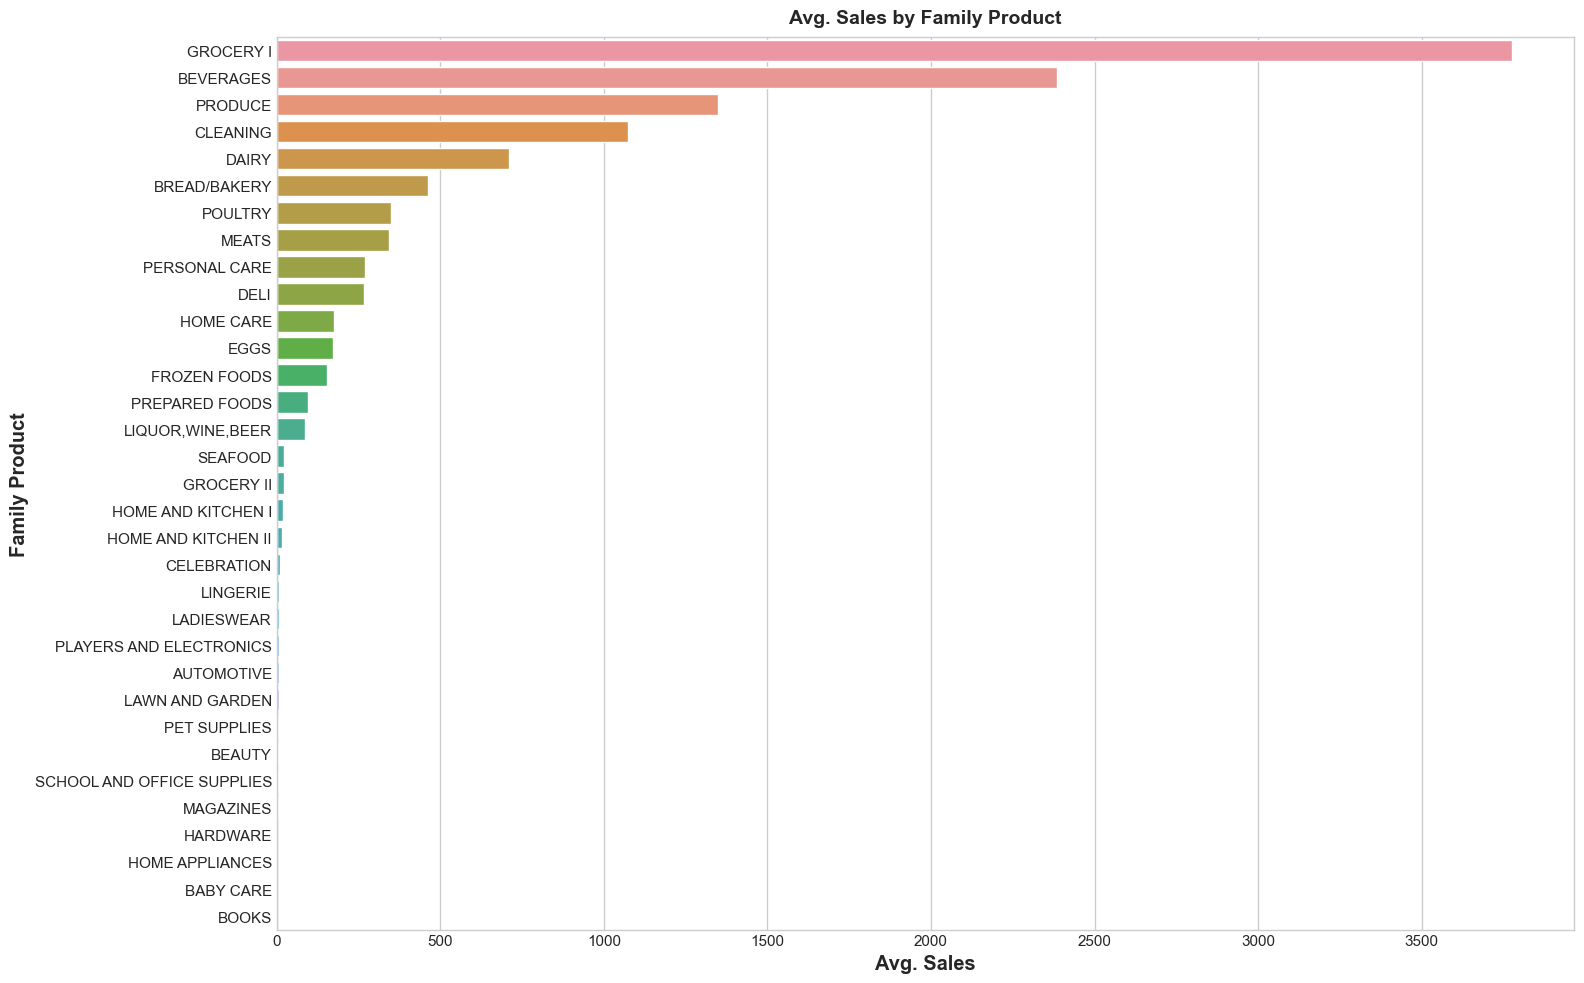

The best family products sell are:  ['GROCERY I', 'BEVERAGES', 'PRODUCE', 'CLEANING', 'DAIRY']

The worst family products sell are:  ['MAGAZINES', 'HARDWARE', 'HOME APPLIANCES', 'BABY CARE', 'BOOKS']


In [19]:
temp=train_eda.groupby('family')['sales'].mean().sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,10))
sns.barplot(data=temp,x=temp.sales,y=temp.index,ci=None,order=list(temp.index))
plt.xlabel('Avg. Sales')
plt.ylabel('Family Product')
plt.title('Avg. Sales by Family Product')
plt.show()

print('The best family products sell are: ',list(temp.index[:5]))
print('\nThe worst family products sell are: ',list(temp.index[-5:]))

## 2.6 Avg Sales by Store No. <a class="anchor"  id="section2.6"></a>

**store_nbr:** identifies the store at which the products are sold.

The same we did with family products, I will do here.

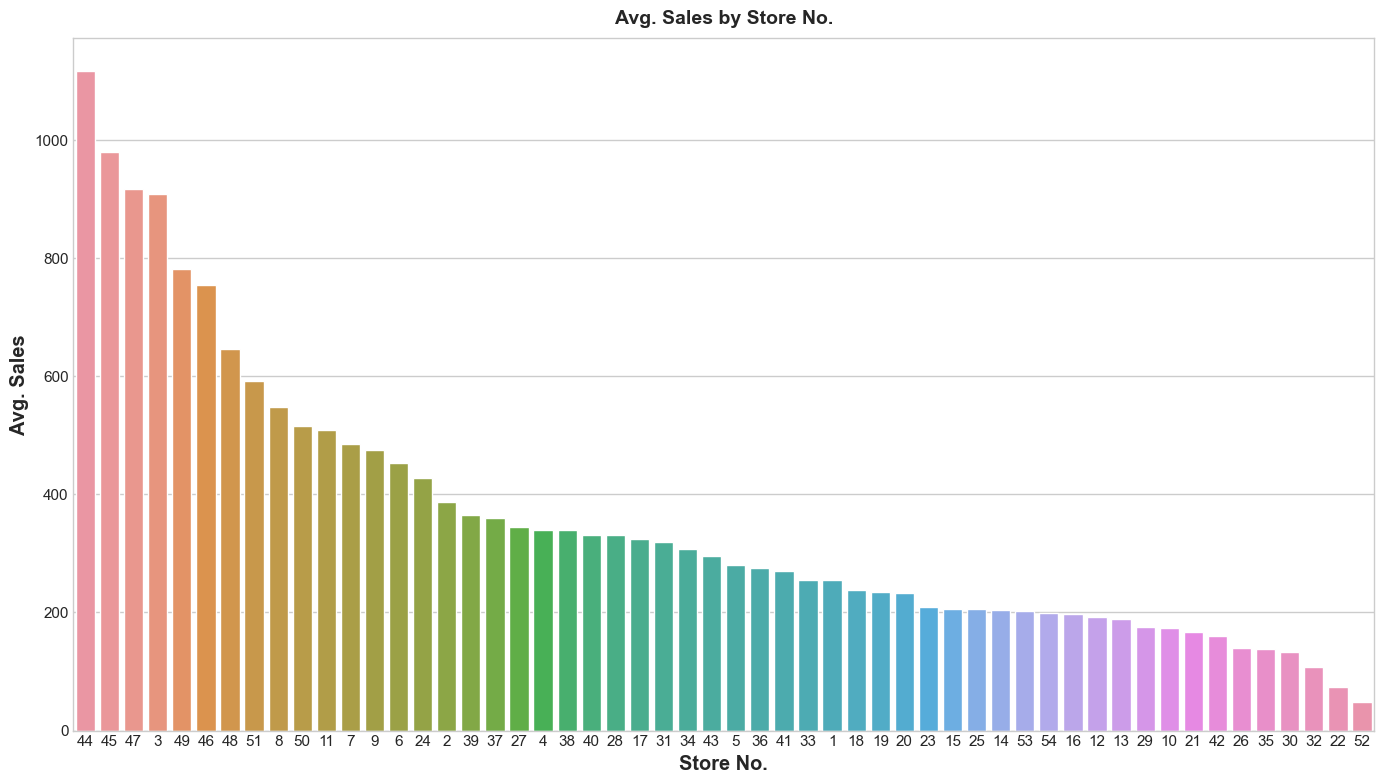

The best stores No. sell are:  [44, 45, 47, 3, 49]

The worst stores No. sell are:  [35, 30, 32, 22, 52]


In [20]:
temp=train_eda.groupby('store_nbr')['sales'].mean().sort_values(ascending=False).to_frame()

plt.figure(figsize=(14,8))
sns.barplot(data=temp,x=temp.index,y=temp.sales,ci=None,order=list(temp.index))
plt.xlabel('Store No.')
plt.ylabel('Avg. Sales')
plt.title('Avg. Sales by Store No.')
plt.show()

print('The best stores No. sell are: ',list(temp.index[:5]))
print('\nThe worst stores No. sell are: ',list(temp.index[-5:]))

## 2.7 Determine Trend <a class="anchor"  id="section2.7"></a>

Let's make a moving average plot to see what kind of trend this series has. Since this series has daily observations, let's choose a window of 365 days to smooth over any short-term changes within the year.

To see what kind of trend a time series might have, we can use a moving average plot. To compute a moving average of a time series, we compute the average of the values within a sliding window of some defined width. Each point on the graph represents the average of all the values in the series that fall within the window on either side. The idea is to smooth out any short-term fluctuations in the series so that only long-term changes remain.

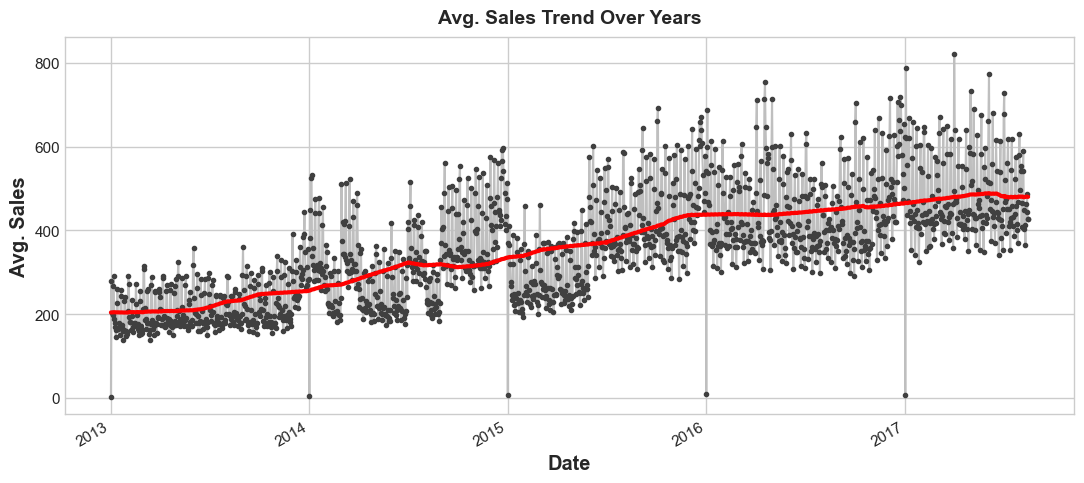

In [21]:
avg_sales=train_eda.groupby('date').sales.mean()
moving_avg=avg_sales.rolling(window=365,min_periods=183,center=True).mean()

ax=avg_sales.plot(**plot_params)
ax=moving_avg.plot(color='red',linewidth=3)
plt.xlabel('Date')
plt.ylabel('Avg. Sales')
plt.title('Avg. Sales Trend Over Years')
plt.show()

What order polynomial trend might be appropriate for the this time series? Can you think of a non-polynomial curve that might work even better? 
The upwards bend in the trend suggests an order 2 (quadratic) polynomial might be appropriate.

## 2.8 Determine Seasonality <a class="anchor"  id="section2.8"></a>


We say that a time series exhibits seasonality whenever there is a regular, periodic change in the mean of the series.

Just like we used a moving average plot to discover the trend in a series, we can use a seasonal plot to discover seasonal patterns.

In [22]:
def seasonal_plot(X, y, period, freq):
    """
    This defination is to plot seasonal fluctuation in a time series to discover seasonal patterns.
    Inputs:
            X: time series.
            y: target variables 
            period: The period of time series
            freq: The frequency to plot time seris for it
    Output:
        Time Series Seasonal Plot    
    """
    _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(x=freq, y=y, hue=period, data=X, ci=False, ax=ax,
                      palette=palette, legend=False)
    
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(name, xy=(1, y_), xytext=(6, 0), color=line.get_color(),size=14,
                    xycoords=ax.get_yaxis_transform(), textcoords="offset points",va="center")
        
    return ax


def plot_periodogram(ts):
    """
    This defination is to discover seasonality and plot the periodogram for a time series. 
    """
    
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(ts, fs=fs, detrend='linear', window="boxcar",scaling='spectrum')
    
    _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        ["Annual (1)", "Semiannual (2)", "Quarterly (4)", "Bimonthly (6)", "Monthly (12)",
         "Biweekly (26)", "Weekly (52)", "Semiweekly (104)"], rotation=30)
    
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    
    return ax

<AxesSubplot: title={'center': 'Seasonal Plot (year/dayofyear)'}, xlabel='dayofyear', ylabel='sales'>

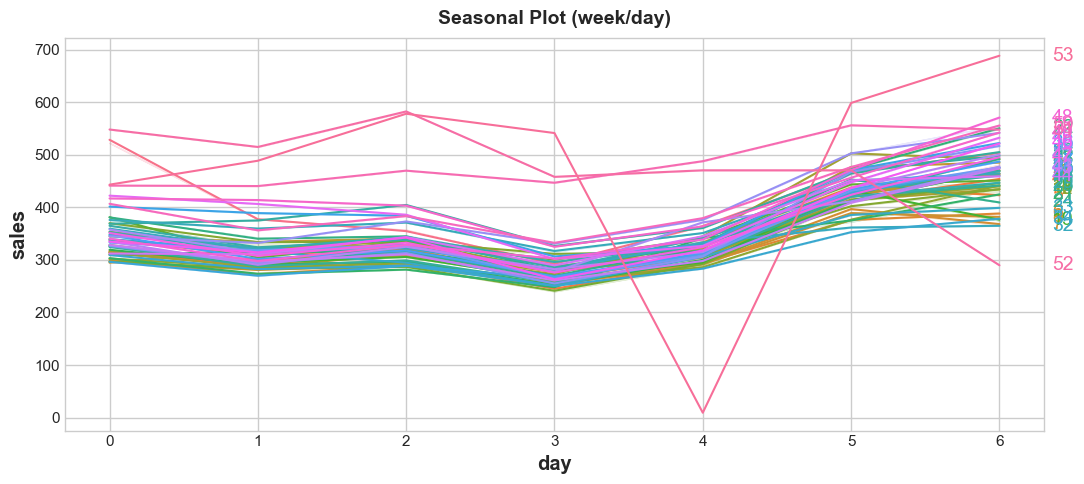

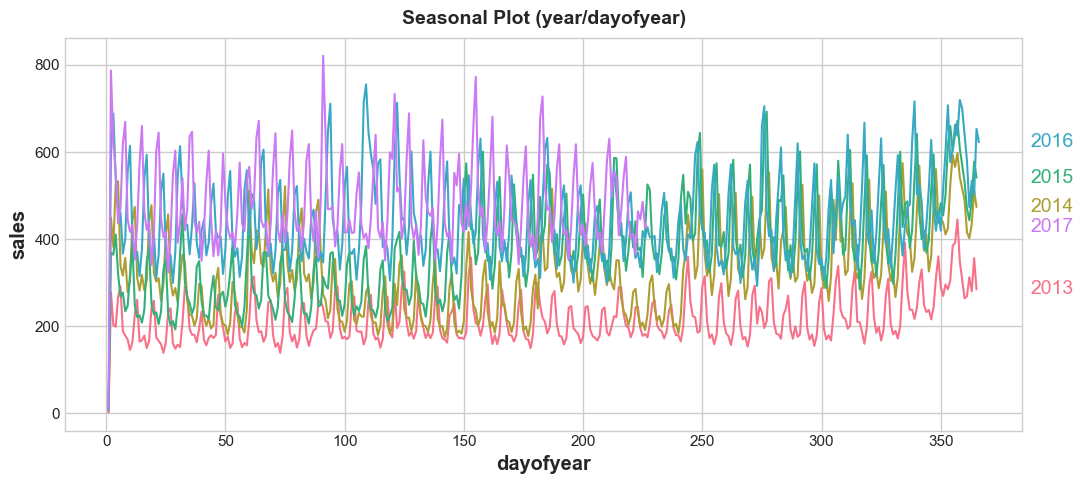

In [23]:
avg_sales = train_eda.groupby('date')['sales'].mean().to_frame()

# days within a week
avg_sales["day"] = avg_sales.index.dayofweek  # the x-axis (freq)
avg_sales["week"] = avg_sales.index.week  # the seasonal period (period)

# days within a year
avg_sales["dayofyear"] = avg_sales.index.dayofyear
avg_sales["year"] = avg_sales.index.year

seasonal_plot(avg_sales, y=avg_sales['sales'], period="week", freq="day")
seasonal_plot(avg_sales, y=avg_sales['sales'], period="year", freq="dayofyear")

Now let's look at the periodogram:

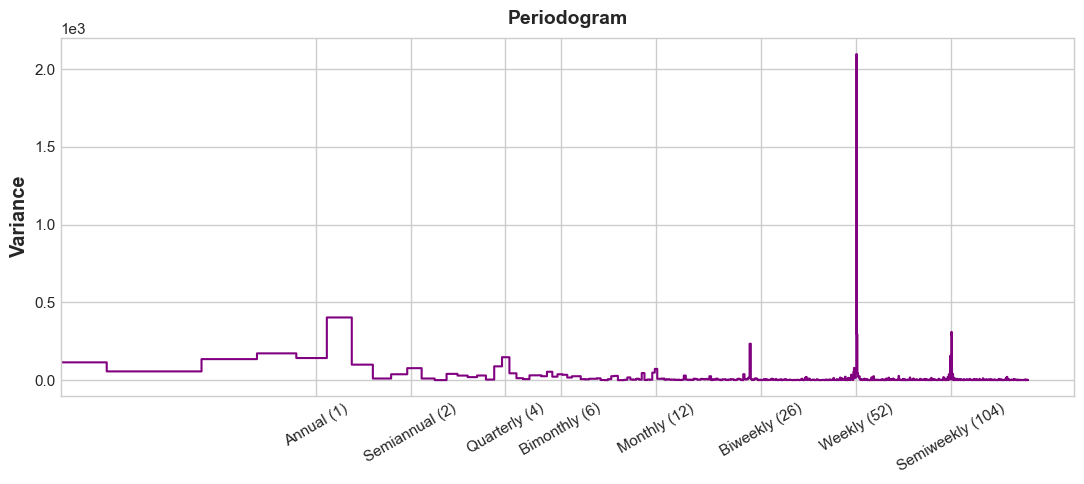

In [24]:
plot_periodogram(avg_sales.sales);

Both the seasonal plot and the periodogram suggest a strong weekly seasonality. From the periodogram, it appears there may be some Annual and Biweekly components as well. In fact, the notes to the Store Sales dataset say wages in the public sector are paid out biweekly, on the 15th and last day of the month -- a possible origin for these seasons.

## 2.9 Lagged Series and Lag Plots <a class="anchor"  id="section2.9"></a>


To investigate possible serial dependence (like cycles) in a time series, we need to create "**lagged**" copies of the series. Lagging a time series means to shift its values forward one or more time steps, or equivalently, to shift the times in its index backward one or more steps. In either case, the effect is that the observations in the lagged series will appear to have happened later in time.

A **lag plot** of a time series shows its values plotted against its lags. Serial dependence in a time series will often become apparent by looking at a lag plot.

When choosing lags to use as features, it generally won't be useful to include every lag with a large autocorrelation, The **partial autocorrelation** tells you the correlation of a lag accounting for all of the previous lags -- the amount of "new" correlation the lag contributes, so to speak. Plotting the partial autocorrelation can help you choose which lag features to use

In [25]:
def lagplot(x, lag=1, ax=None):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(alpha=0.75, s=3)
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_, y=y_, scatter_kws=scatter_kws,
                     line_kws=line_kws, lowess=True, ax=ax)
    
    at = AnchoredText(f"{corr:.2f}", prop=dict(size="large"), frameon=True, loc="upper left")
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax


def plot_lags(x, y=None, lags=6, nrows=1, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, lag=k + 1, ax=ax)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

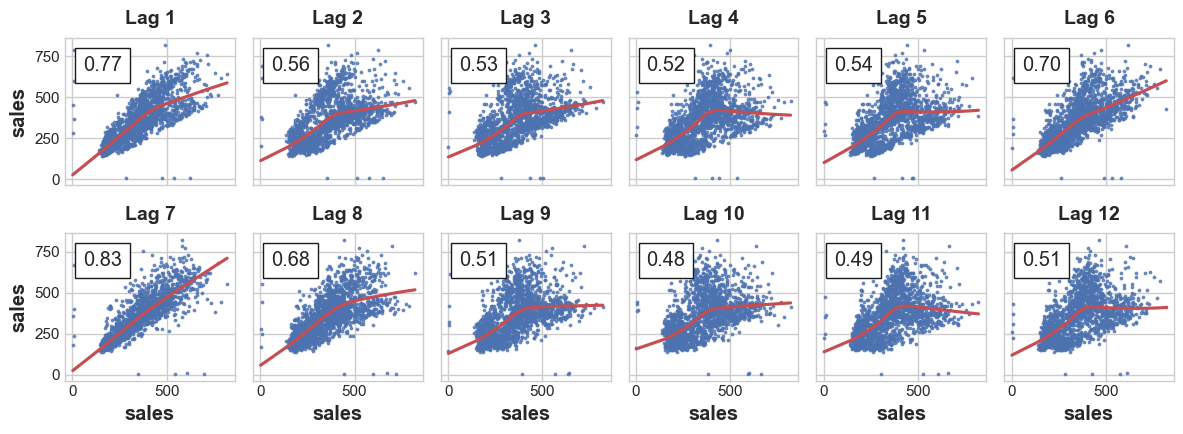

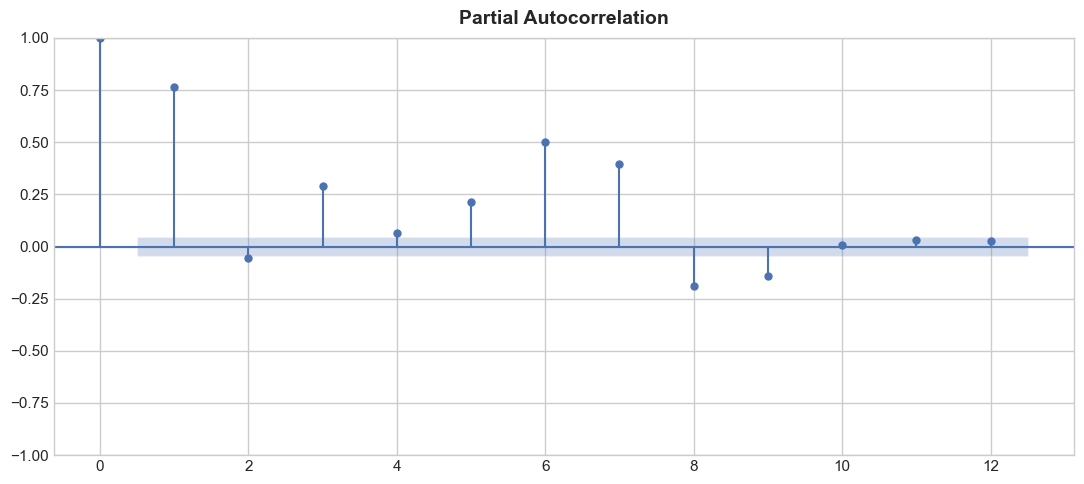

In [26]:
from statsmodels.graphics.tsaplots import plot_pacf

_ = plot_lags(avg_sales.sales, lags=12, nrows=2)
_ = plot_pacf(avg_sales.sales, lags=12)

The lag plots indicate that the relationship of sales to its lags is somehow linear, while the partial autocorrelations suggest the dependence can be captured using lags 1, 3, 5, 6, 7, 8 and 9, So these lags will be used in training.

 # 3. HOLIDAYS & EVENTS <a class="anchor"  id="section3"></a>


At trading world, every person belive that sales at holidays, weekends and events are larger than any work day..

## 3.1 Holidays & Events Dataset Analysis <a class="anchor"  id="section3.1"></a>

I belive that this supplementary dataset has a large correlation with train dataset, So Let's get some useful sale indicators from it.

In [27]:
display(holidays_events.info())
info(holidays_events)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


None

==========date ==========
Type is:  datetime64[ns]
2014-06-25    4
2017-06-25    3
2016-06-25    3
2015-06-25    3
2013-06-25    3
             ..
2014-07-13    1
2014-07-12    1
2014-07-09    1
2014-07-08    1
2017-12-26    1
Name: date, Length: 312, dtype: int64
Number of unique values:  312
Number of null values:  0
==========type ==========
Type is:  object
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64
Number of unique values:  6
Number of null values:  0
==========locale ==========
Type is:  object
National    174
Local       152
Regional     24
Name: locale, dtype: int64
Number of unique values:  3
Number of null values:  0
==========locale_name ==========
Type is:  object
Ecuador                           174
Quito                              13
Riobamba                           12
Guaranda                           12
Latacunga                          12
Ambato                             

In [28]:
""" 
As described at metadata, "Pay special attention to the transferred column.
A holiday that is transferred officially falls on that calendar day, 
but was moved to another date by the government." So I will get rid holidays that were transferred
and holidays that are announced a Work day, in addition to dates that are duplicated.
"""   
holidays_events= holidays_events.loc[(holidays_events.transferred==False) & (holidays_events.type != 'Work Day')]
holidays_events=holidays_events.drop_duplicates(subset='date')  ## Drop duplicated dates

One important thing is to check if average sales are more at Holidays & Events than work days.
In next sections, I will investigate that, in addition I need to know which holidays their impact is significant on average sales, so we can use it as indecator for sales prediction model training. 

Holidays dataset has column distinguishes  between "local", "National", "Regional" holidays, So I will get insights from average sales during these three types of holidays. 

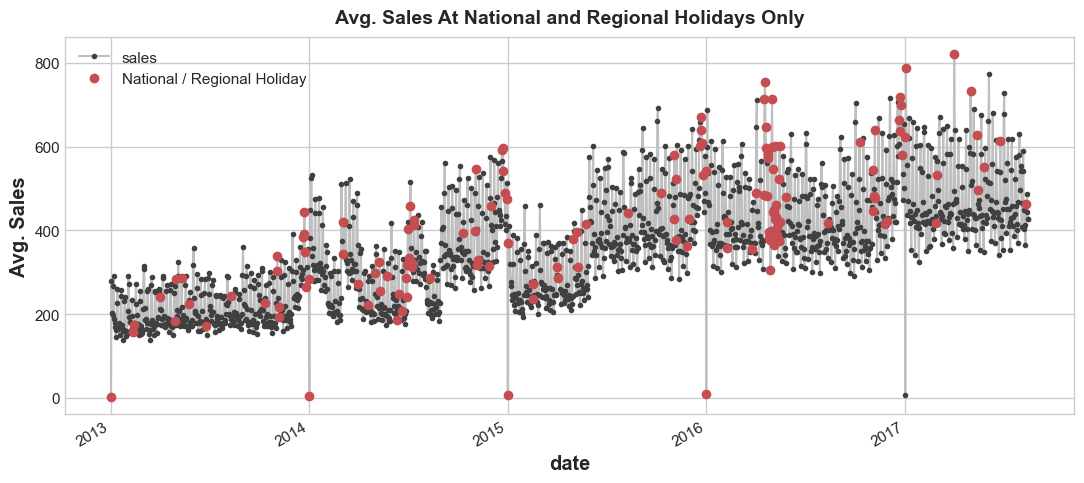

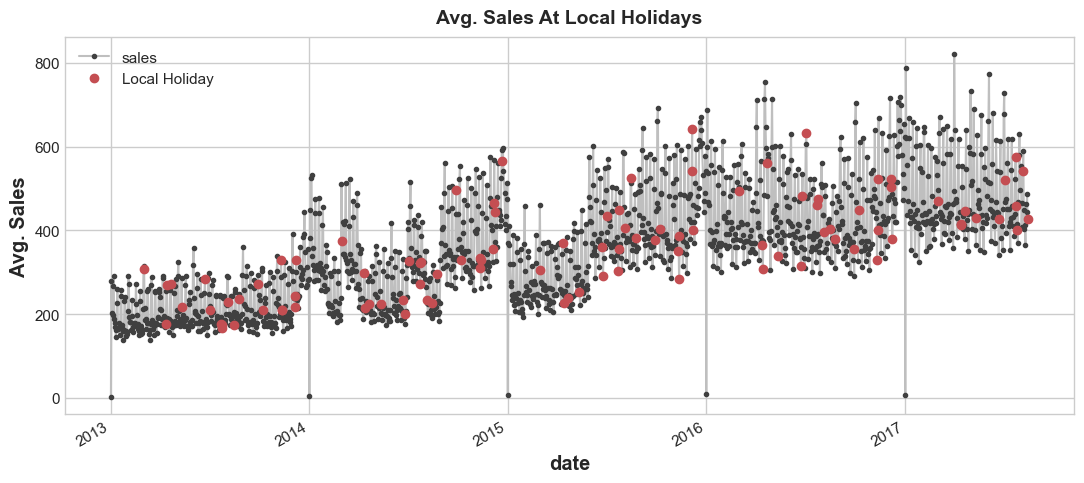

In [30]:
## National and Regional Holidays Only

NRHolidays=holidays_events.loc[holidays_events['locale']!='Local',:]
NRHolidays_avg_sales=avg_sales.reset_index().merge(NRHolidays,on='date',how='left')
x_cor=NRHolidays_avg_sales.loc[NRHolidays_avg_sales['type'].notna(),'date'].values
y_cor=NRHolidays_avg_sales.loc[NRHolidays_avg_sales['type'].notna(),'sales'].values
_=avg_sales['sales'].plot(**plot_params)
_=plt.plot_date(x_cor,y_cor,color='C3', label='National / Regional Holiday')
_=plt.ylabel('Avg. Sales')
_=plt.title('Avg. Sales At National and Regional Holidays Only')
_=plt.legend()

plt.show()

## LocalHolidays Only
LHolidays=holidays_events.loc[holidays_events['locale']=='Local',:]
LHolidays_avg_sales=avg_sales.reset_index().merge(LHolidays,on='date',how='left')
x_cor=LHolidays_avg_sales.loc[LHolidays_avg_sales['type'].notna(),'date'].values
y_cor=LHolidays_avg_sales.loc[LHolidays_avg_sales['type'].notna(),'sales'].values
_=avg_sales['sales'].plot(**plot_params)
_=plt.plot_date(x_cor,y_cor,color='C3', label='Local Holiday')
_=plt.ylabel('Avg. Sales')
_=plt.title('Avg. Sales At Local Holidays')
_=plt.legend()

plt.show()

Indeed, there is a differance between those three holiday types, Sales at Local holidays has no significant impact than another normal days, while sales at National/ Regional holidays are more significant for sales versus another days.

I will get rid Local holidays.

In [31]:
holidays_events= holidays_events[holidays_events.locale!='Local']

## 3.2 Avg Sales on Holidays  vs. Workdays <a class="anchor"  id="section3.2"></a>

I will merge "train" & "holidays_events" datasets togather, creat new holiday indicator column at the new merged dataset that take two values:

* 0 for workdays.
* 1 for holiday, event, bridge, additional, weekend days.

In [32]:
## Merging and Mapping:
holidays_events=holidays_events[['date','type']] ## Keep date & holiday type for merging
train_eda=pd.merge(left=train_eda, right=holidays_events, on='date', how='left')
train_eda.rename({'type':'is_holiday'},axis=1,inplace=True)
train_eda['is_holiday']=train_eda.is_holiday.map({'Holiday':1,'Additional':1,'Event':1,
                                                  'Bridge':1,'Transfer':1}).fillna(0).astype('int8')

## Adding weekends to holiday as well
train_eda.set_index('date',inplace=True)
train_eda['day_of_week']=train_eda.index.dayofweek.astype('int8')
train_eda.loc[(train_eda['day_of_week']==5) | (train_eda['day_of_week']==6), 'is_holiday']=1

## Removing he first day of a year from holidays as mentioned before Favorita is closed these days.
train_eda['day_of_year']=train_eda.index.dayofyear.astype('int16')
train_eda.loc[train_eda['day_of_year']==1 ,'is_holiday']=0

train_eda.head()

,id,store_nbr,family,sales,onpromotion,is_holiday,day_of_week,day_of_year
date,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,0,1,1
2013-01-01,1,1,BABY CARE,0.0,0,0,1,1
2013-01-01,2,1,BEAUTY,0.0,0,0,1,1
2013-01-01,3,1,BEVERAGES,0.0,0,0,1,1
2013-01-01,4,1,BOOKS,0.0,0,0,1,1


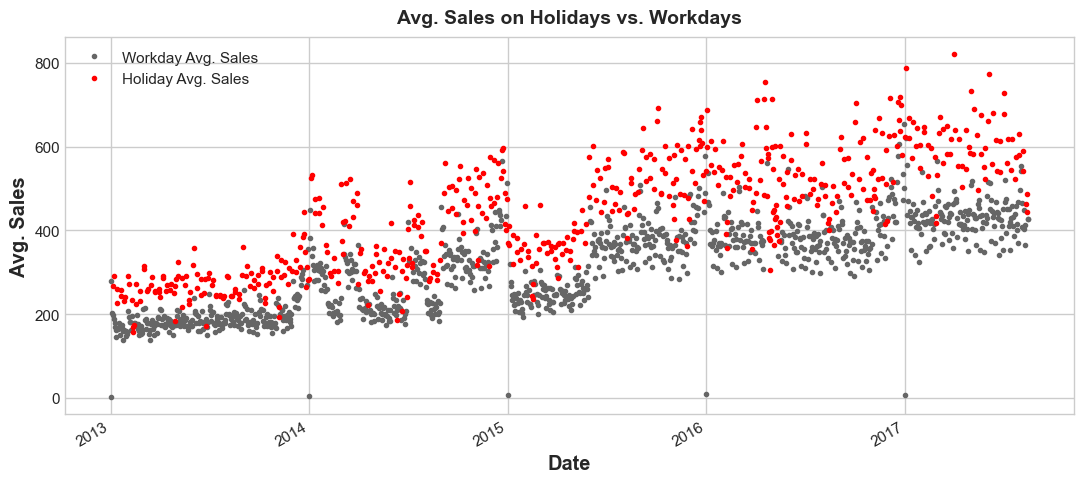

In [33]:
avg_sales_holiday=train_eda[train_eda.is_holiday==1].groupby('date')['sales'].mean() ## Grouping by holidays
avg_sales_workday=train_eda[train_eda.is_holiday==0].groupby('date')['sales'].mean() ## Grouping by workdays

_=avg_sales_workday.plot(color='0.4',style='.', legend=True, label='Workday Avg. Sales')
_=avg_sales_holiday.plot(color='red',style='.', legend=True, label='Holiday Avg. Sales')
plt.xlabel('Date')
plt.ylabel('Avg. Sales')
plt.title('Avg. Sales on Holidays vs. Workdays')

plt.show()

**Conclusions:**

* We succeed to prove the trading theory, from above chart we can obviously see the high difference between sales on holidays versus workdays. Except the zero sales at the first day of the years, and that is as mentioned before due to Favorita supermarkets chain was closed.

* Holiday indicator will be used as a variable for training.

 # 4. OIL PRICES <a class="anchor"  id="section4"></a>

Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.

## 4.1 Oil Dataset Preview <a class="anchor"  id="section4.1"></a>

Daily oil price. Includes values during both the train and test data timeframes.

In [34]:
display(oil.info())
info(oil)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


None

==========date ==========
Type is:  datetime64[ns]
2013-01-01    1
2016-02-08    1
2016-02-17    1
2016-02-16    1
2016-02-15    1
             ..
2014-07-22    1
2014-07-21    1
2014-07-18    1
2014-07-17    1
2017-08-31    1
Name: date, Length: 1218, dtype: int64
Number of unique values:  1218
Number of null values:  0
==========dcoilwtico ==========
Type is:  float64
47.72    4
47.65    4
96.44    4
60.01    4
46.02    4
        ..
94.35    1
96.40    1
93.97    1
95.39    1
47.26    1
Name: dcoilwtico, Length: 998, dtype: int64
Number of unique values:  998
Number of null values:  43


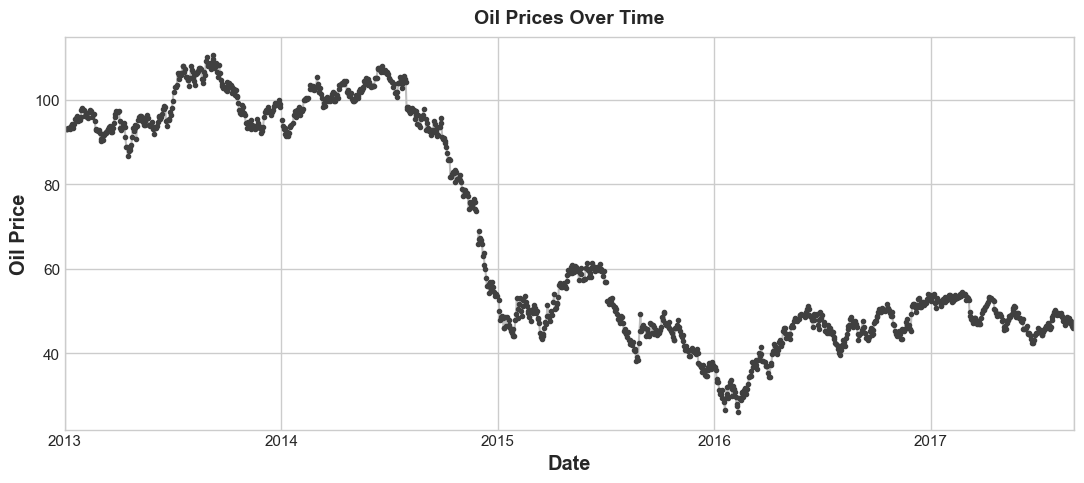

In [35]:
oil.set_index('date',inplace=True)
oil.plot(**plot_params)
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Oil Prices Over Time')
plt.show()

## 4.2 Avg Sales vs Oil Prices <a class="anchor"  id="section4.2"></a>

Higher oil prices tend to make production more expensive for businesses, just as they make it more expensive for households to do the things they normally do. It turns out that oil and gasoline prices are indeed very closely related.

I belive that Favorita Supermarkets chain have impacted from daily oil prices on thier sales,so as what I did at the last section, I will merge oil dataset with train dataset to get insights.

In [36]:
## Merging and Filling nans:
train_eda=pd.merge(left=train_eda,right=oil,left_index=True,right_index=True,how='left')

train_eda.rename({'dcoilwtico':'oil_price'},axis=1,inplace=True)

train_eda['oil_price']=train_eda['oil_price'].fillna(method='ffill').fillna(method='bfill').astype('float16')

The correlation between average sales & oil price is:  -0.6269 



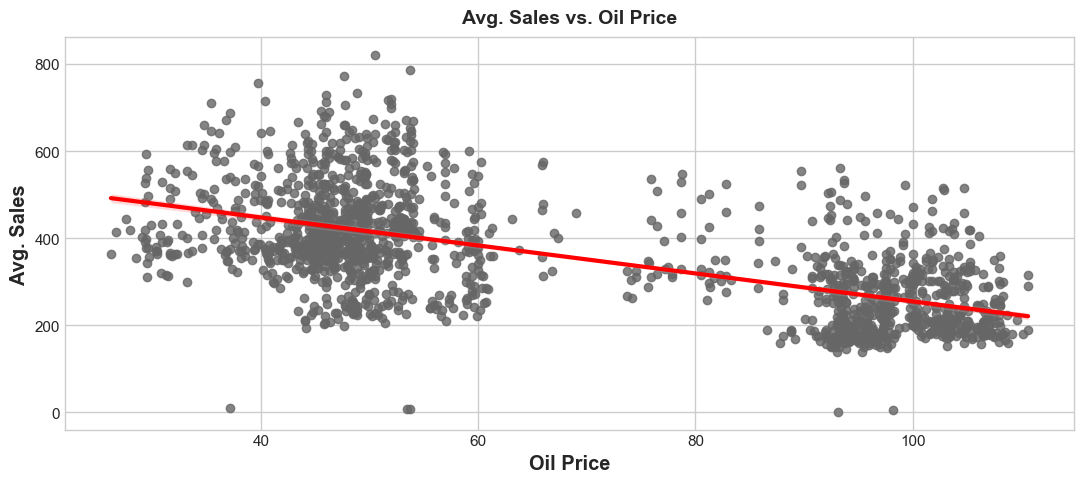

In [37]:
avg_sales = train_eda.groupby(['date','oil_price'])['sales'].mean().reset_index() ## Grouping by oil_price

print('The correlation between average sales & oil price is: ',
      np.round(avg_sales[['sales','oil_price']].corr().iloc[0,1],4),'\n')

# Plotting
sns.regplot(data=avg_sales, x='oil_price', y='sales', scatter_kws={'color':'0.4'},
           line_kws={'color':'red', 'linewidth':3})
plt.xlabel('Oil Price')
plt.ylabel('Avg. Sales')
plt.title('Avg. Sales vs. Oil Price')
plt.show()

**Conclusions:**


* At a consumer level, lower oil prices means more purchasing power for the customers. This explains why there's an increase in average sales since mid-2015.

* The chart above clearly tells us that when there are lower oil prices the average units sold increases. Therefore, oil prices will be used as a variable for training.

 # 5. STORES ANALYSIS <a class="anchor"  id="section5"></a>

In [38]:
display(stores.info())
info(stores)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


None

==========store_nbr ==========
Type is:  int64
1     1
41    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
42    1
2     1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
50    1
51    1
52    1
53    1
29    1
28    1
27    1
26    1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
54    1
Name: store_nbr, dtype: int64
Number of unique values:  54
Number of null values:  0
==========city ==========
Type is:  object
Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Manta             2
Latacunga         2
Machala           2
Ambato            2
Quevedo           1
Esmeraldas        1
Loja              1
Libertad          1
Playas            1
Daule             1
Babahoyo          1
Salinas           1
Puyo              1
Guaranda          1
Ibarra            1
Riobamba     

In [39]:
avg_sales=train_eda.groupby('store_nbr')['sales'].mean().reset_index()

stores=stores.merge(avg_sales,on='store_nbr',how='left')

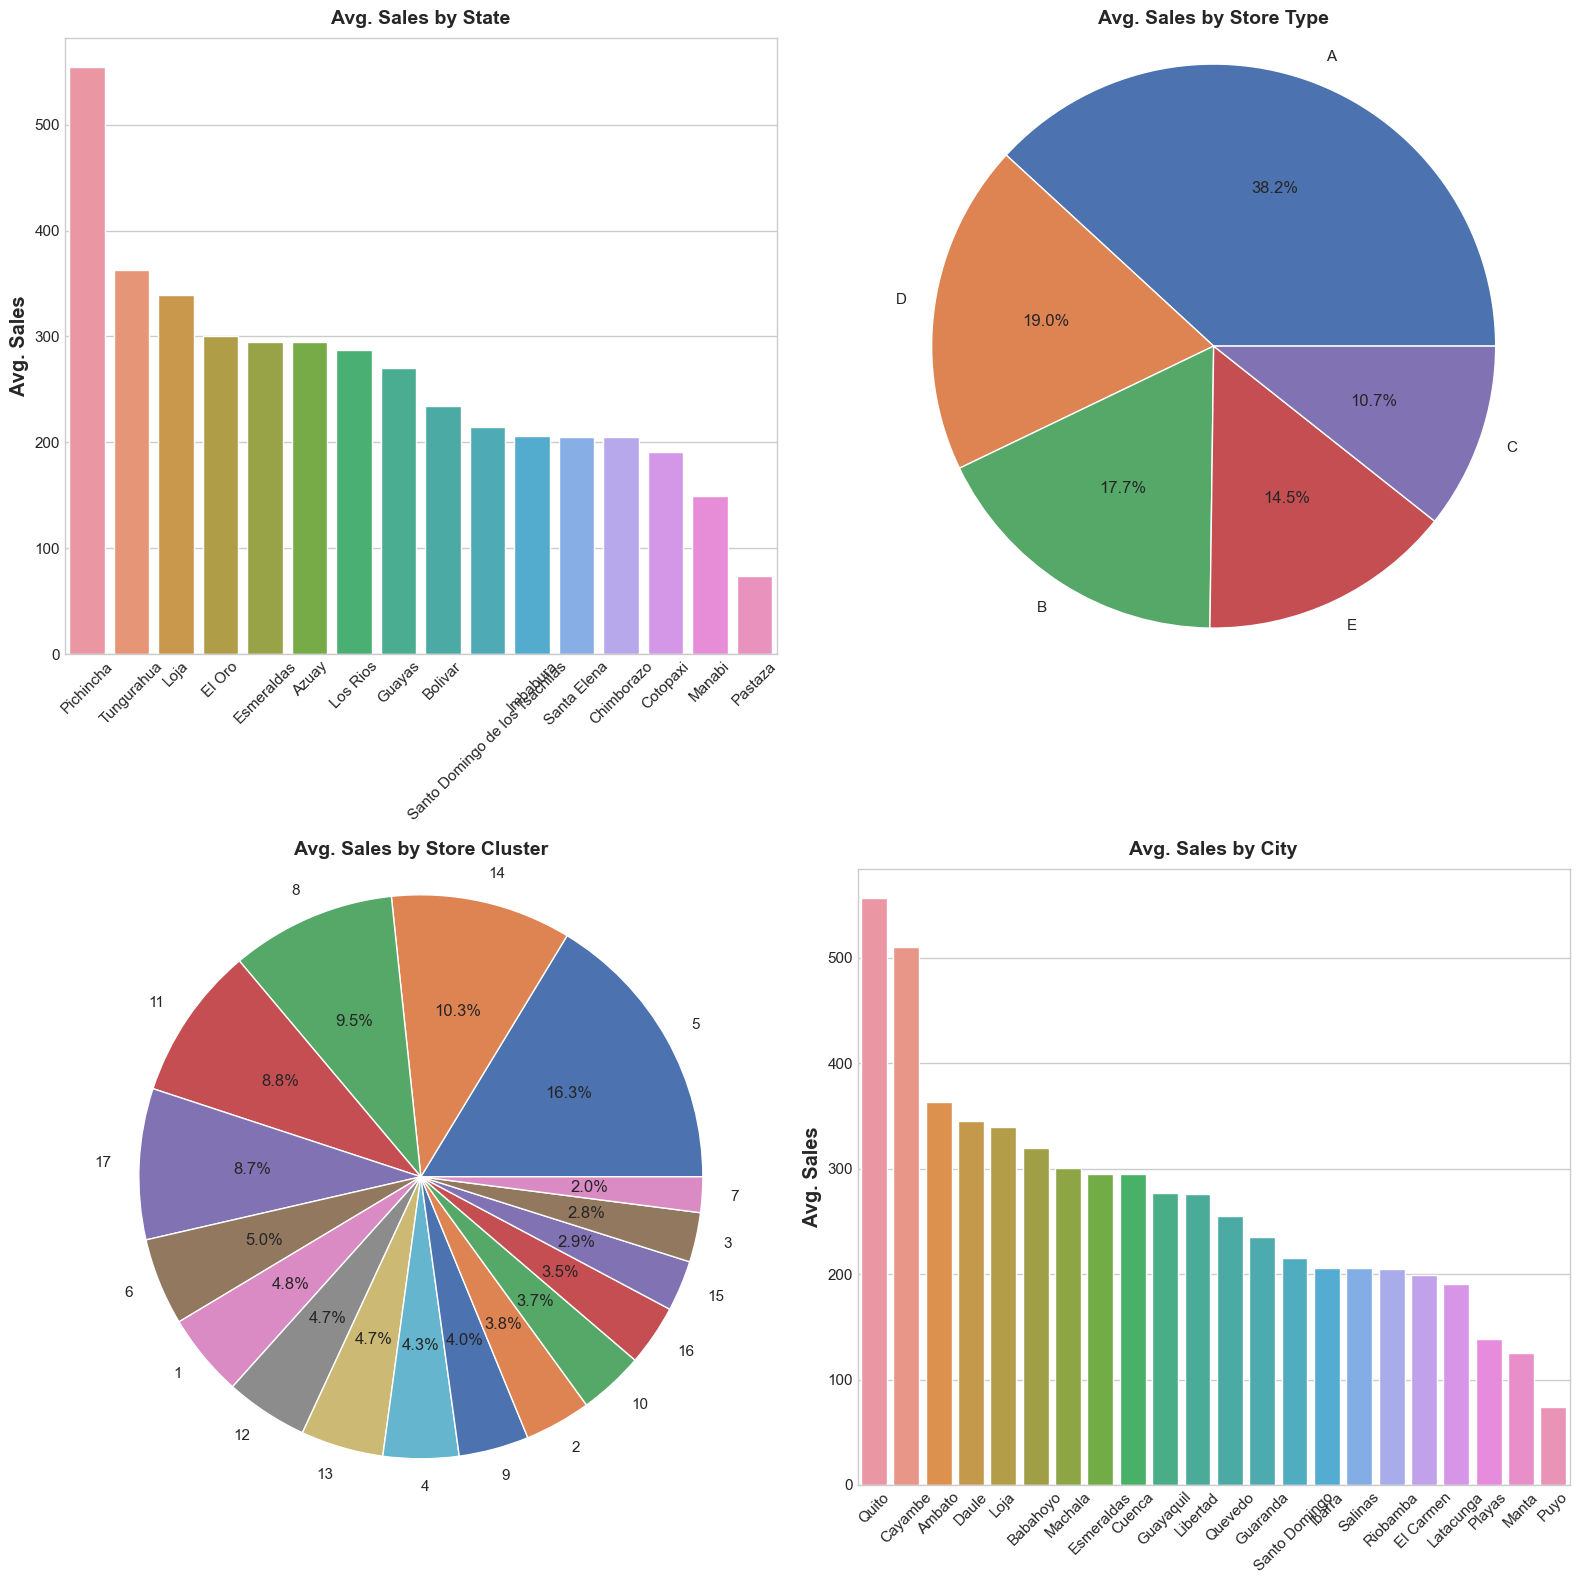

In [40]:
plt.figure(figsize=(16,16))

plt.subplot(2,2,1) ## Avg. Sales by State Chart
state_grouped=stores.groupby('state')['sales'].mean().sort_values(ascending=False)
sns.barplot(x=state_grouped.index, y=state_grouped.values,
           ci=None, order=list(state_grouped.index))
plt.xlabel('')
plt.xticks(rotation=45)
plt.ylabel('Avg. Sales')
plt.title('Avg. Sales by State')

plt.subplot(2,2,2)
type_grouped=stores.groupby('type')['sales'].mean().sort_values(ascending=False)
plt.pie(type_grouped, labels=type_grouped.index, autopct="%1.1f%%")
plt.axis('equal')
plt.title('Avg. Sales by Store Type')

plt.subplot(2,2,3)
cluster_grouped=stores.groupby('cluster')['sales'].mean().sort_values(ascending=False)
plt.pie(cluster_grouped, labels=cluster_grouped.index, autopct="%1.1f%%")
plt.axis('equal')
plt.title('Avg. Sales by Store Cluster')

plt.subplot(2,2,4)
city_grouped=stores.groupby('city')['sales'].mean().sort_values(ascending=False)
sns.barplot(x=city_grouped.index, y=city_grouped.values,
           ci=None, order=list(city_grouped.index))
plt.xlabel('')
plt.xticks(rotation=45)
plt.ylabel('Avg. Sales')
plt.title('Avg. Sales by City')

plt.show()

**Conclusions:**

1. The best States sells are ( Pichincha, Tungurahua, Loja ), while the worst are ( Cotopaxi, Manabi, Pastaza ).

2. The best Cities sells are ( Quito, Cayambe, Ambato ), while the worst are ( Playas, Manta, Puyo ).

3. The best Store Clusters sells are (5, 14, 8, 11), while the worst are (7, 3, 15, 16).

4. The order of best Store Type is: A -> D -> B -> E -> C.

All of these variable have impact on Favorita Supermarkets sales, So thew will be used in trainig.

In [41]:
## Converting dtypes for stores variables to category for simplification.
stores['type']=pd.Categorical(stores['type'], categories=type_grouped.index[::-1], ordered=True)
stores['cluster']=pd.Categorical(stores['cluster'], categories=cluster_grouped.index[::-1], ordered=True)
stores['state']=pd.Categorical(stores['state'], categories=state_grouped.index[::-1], ordered=True)
stores['city']=pd.Categorical(stores['city'], categories=city_grouped.index[::-1], ordered=True)
stores.drop('sales', axis=1, inplace=True)

 # 6. TRANSACTIONS <a class="anchor"  id="section6"></a>
 
Transactions means how many people came to the store or how many invoices created in a day.

This feature is highly correlated with sales.

## 6.1 Transactions Dataset Preview <a class="anchor"  id="section6.1"></a>

Sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).

That's why, transactions will be one of the relevant features in the model. In the following sections, we will generate new features by using transactions.

In [42]:
display(transactions.info())
info(transactions)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


None

==========date ==========
Type is:  datetime64[ns]
2017-08-15    54
2017-06-02    54
2017-05-21    54
2017-05-22    54
2017-05-23    54
              ..
2016-01-04    14
2014-01-01     2
2017-01-01     1
2015-01-01     1
2013-01-01     1
Name: date, Length: 1682, dtype: int64
Number of unique values:  1682
Number of null values:  0
==========store_nbr ==========
Type is:  int64
39    1678
38    1678
26    1678
31    1678
33    1678
34    1678
37    1678
27    1677
28    1677
32    1677
23    1677
40    1677
41    1677
44    1677
45    1677
46    1677
47    1677
48    1677
50    1677
51    1677
49    1677
2     1677
16    1677
5     1677
54    1676
3     1676
4     1676
6     1676
8     1676
9     1676
19    1676
35    1676
13    1676
1     1676
15    1676
11    1676
10    1675
7     1675
17    1674
43    1672
30    1655
14    1638
12    1616
25    1615
24    1577
18    1566
36    1551
53    1167
20     909
29     874
21     748
42     720
22     671
52     118
Name: store_nbr, dtype: i

## 6.2 Total Sales vs Transactions <a class="anchor"  id="section6.2"></a>

The correlation between total sales & transactions is:  0.8374 



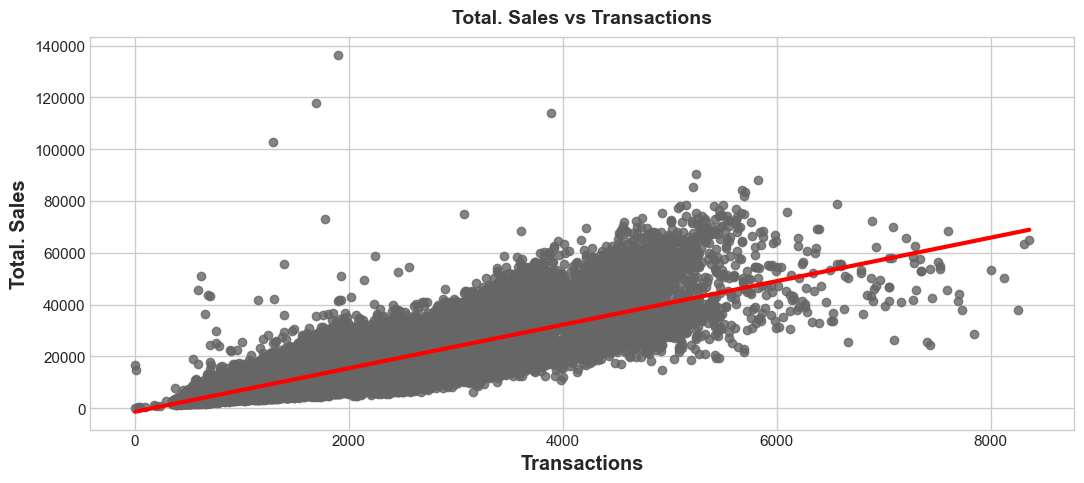

In [43]:
avg_sales = train_eda.groupby(['date','store_nbr'])['sales'].sum().reset_index() ## Grouping by store_nbr

temp = pd.merge(avg_sales, transactions, how = "left") ## Merging 

print('The correlation between total sales & transactions is: ',
      np.round(temp[['sales','transactions']].corr().iloc[0,1],4),'\n')

# Plotting
sns.regplot(data=temp,x='transactions',y='sales',ci=None,
            scatter_kws={'color':'0.4'},line_kws={'color':'red','linewidth':3})
plt.xlabel('Transactions')
plt.ylabel('Total. Sales')
plt.title('Total. Sales vs Transactions')
plt.show()

**Let's take a look at transactions by store total sales!**


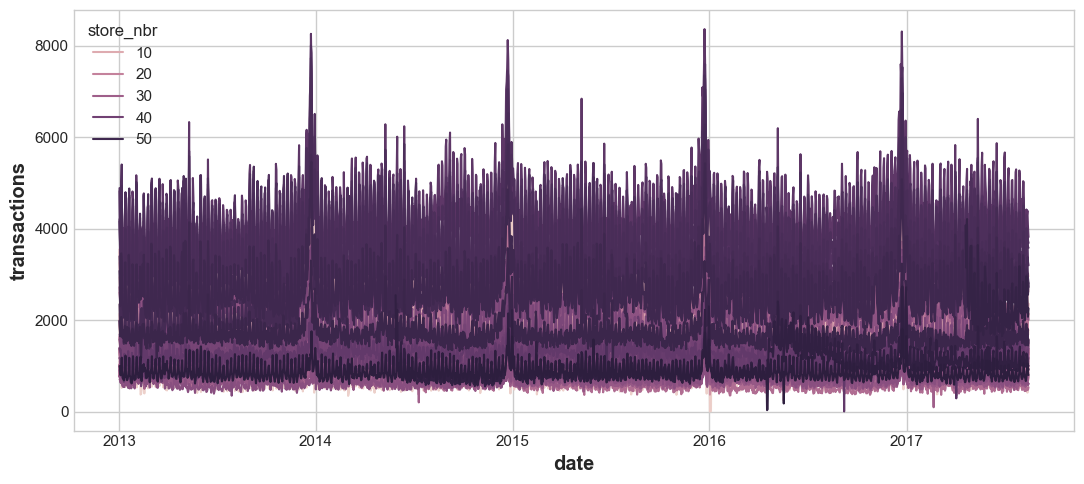

In [44]:
sns.lineplot(data=temp,x='date',y='transactions',hue='store_nbr')
plt.show()

There is a stable pattern in Transaction. All months are similar except December from 2013 to 2017.

Store sales had always increased at the end of the year.

Transactions will be used in training as well.